In [ ]:
# Importando as bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

# Parte 1: Limpeza e Preparação dos Dados (Limpeza de Dados, tratamento de valores ausentes e duplicados.)

Nesse momento vamos verificar as informações basicas do dataset e tratar seus dados.

### 1- Visão Geral dos Dados
* Quantas linhas e Colunas cada dataset possui? **Prime Video 9668 Linhas e 12 Colunas, Netflix 8807 linhas e 12 colunas e Disney+ 1450 linhas e também 12 Colunas**
* Quais são os tipos de dados de cada coluna? Para todos os dataset as colunas e tipos são iguais, sendo os representados abaixo:


|Colunas|Tipo|
|-------|----|
|show_id|Object|
|type|object|
|title|Object|
|director|objetct|
|cast|Object|
|country|Object|
|date_added|Object|
|release_year|int_64|
|rating|Object|
|Duration|Object|
|listed_id|Object|
|description|Objetct|

In [ ]:
path_netflix = '/content/netflix_titles.csv'
df_netflix = pd.read_csv(path_netflix)
df_netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Conferindo as informações do dataset
print(df_netflix.shape)

(8807, 12)


In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Retirando as strings da coluna de duração
df_netflix['duration'] = df_netflix['duration'].str.replace(' min', '', regex=False)
df_netflix['duration'] = df_netflix['duration'].str.replace(' Seasons', '', regex = False)
df_netflix['duration'] = df_netflix['duration'].str.replace(' Season', '', regex = False)

# Convertendo a coluna para o tipo numeric
df_netflix['duration'] = pd.to_numeric(df_netflix['duration'])

In [ ]:
# Realizando a conversão das colunas.
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], format='mixed', dayfirst=True)
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], format='%d/%m/%Y')

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [ ]:
# Criando a nova coluna de país, onde separamos os titulos com mais de um país
df_netflix['country_expand'] = df_netflix['country'].astype(str)
df_netflix['country_expand'] = df_netflix['country'].str.split(', ')
df_netflix_countries = df_netflix.explode('country_expand')
df_netflix_countries['country_expand'] = df_netflix_countries['country_expand'].str.strip()
df_netflix_countries

df_netflix_countries.to_excel('df_netflix_countries.xlsx', index = False)

In [ ]:
# Criando um nova coluna com os diretores, e salvando em um novo dataset.
df_netflix['director_expand'] = df_netflix['director'].astype(str)
df_netflix['director_expand'] = df_netflix['director'].str.split(', ')
df_netflix_directors = df_netflix.explode('director_expand')
df_netflix_directors['director_expand'] = df_netflix_directors['director_expand'].str.strip()
df_netflix_directors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_expand,director_expand
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",[United States],Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[India],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",[United States],David Fincher
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,[United States],Ruben Fleischer
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",[United States],Peter Hewitt


In [ ]:
# Criando um nova coluna com o cast completo, e salvando em um novo dataset.
df_netflix['cast_expand'] = df_netflix['cast'].astype(str)
df_netflix['cast_expand'] = df_netflix['cast'].str.split(', ')
df_netflix_cast = df_netflix.explode('cast_expand')
df_netflix_cast['cast_expand'] = df_netflix_cast['cast_expand'].str.strip()
df_netflix_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_expand,director_expand,cast_expand
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",[United States],[Kirsten Johnson],NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],NaN,Ama Qamata
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],NaN,Khosi Ngema
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],NaN,Gail Mabalane
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa],NaN,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,[India],[Mozez Singh],Manish Chaudhary
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,[India],[Mozez Singh],Meghna Malik
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,[India],[Mozez Singh],Malkeet Rauni
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,[India],[Mozez Singh],Anita Shabdish


### 2- Identificação de valores ausentes:
* Quais colunas possuem valores ausentes (NaN)?
* Quantos valores ausentes existem em cada uma?
    * Resposta:


    |df_prime||df_netflix||df_disney||
    |--------|-----|-----|---------|------|-------|
    |**Coluna**|**Qtd NaN**|**Coluna**|**Qtd NaN**|**Coluna**|**Qtd NaN**|
    |Director|2083|director|2634|directo|473|
    |cast|1233|cast|825|cast|190|
    |country|8996| country|831|country|219|
    |date_added|9513|date_added|10|date_added|3|
    |rating|337|rating|4|rating|3|
    ||         |duration|3|||



* Proponha uma estratégia para lidar com os valores ausentes, como preencher, remover ou simplesmente ignorar (justifique a decisão.)
    * Nos dataset df_netflix e df_prime temos muitos dados ausentes em colunas especificas, no caso do dataset netflix podemos dropar todos as linhas com dados ausentes para termos uma análise mais coerente, se preechermos eles podemos ter alterações nos insights e isso não estaria correto. No prime o tratamento terá que ser diferente, visto que temos uma coluna com 98% dos dados ausentes.
    No nosso dataset do disney+ em comparação aos outros não temos tantos dados ausentes, mas em questão de proporção também temos bastante dados ausentes mas em colunas diferente, onde podemos utilizar a mesma estrategia do dataset netflix e excluir essas linhas para termos uma analise mais real e acertiva.

    * Adição: mais uma trativa que podemos fazer é converter a coluna date_added para o formato datetime, utilizando a função do pandas ```pd.to_datetime```
    


In [ ]:
# Verificando os dados ausentes do dataset do netflix
(df_netflix.isna().sum()/len(df_netflix)) *100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
# Completando as colunas com valores ausentes
df_netflix['director'].fillna('director_Unknow', inplace = True)
df_netflix['cast'].fillna('cast_Unknow', inplace = True)
df_netflix['country'].fillna('country_Unknow', inplace = True)
df_netflix.dropna(inplace = True)

In [ ]:
df_netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# ***Parte 2: Análise Exploratória de Dados (EDA)***

### 1. **Distribuição do Conteúdo:**

* Qual a porporção de filmes e séries de TV em cada Plataforma?

|Streaming|Tipo|Quantidade|
|---------|----|----------|
|Netflix|Filmes|5185|
|Netflix|Series|147|
|Disney+|Filmes|818|
|Prime Video|Filmes|7814|
|Prime Video|Series|1854|


* Apresente essa proporção em um gráfico, inicialmente separadamente por plataforma e após isso todas as plataformas juntas.

### 2. Conteúdo por Ano de Lançamento (release_year)

* Qual plataforma adicionou mais títulos a cada ano?
    * Netflix adicionou mais titulos a cada ano, por conta de ter sido lançado antes e ter uma base de clientes maior, não podemos realizar a mesma analise para o prime visto que a maioria dos filmes teve o campo preenchido
* Apresente essa compração em um gráfico que mostre a quantidade de títulos por ano em cada plataforma.

### 3. Duração de Filmes e temporadas:
* Qual é a duração média dos filmes em cada plataforma? 102.7 minutos
* Quais são as 5 séries de TV mais longas em cada plataforma (em número de temporadas)? 15 Temporadas

### 4. Conteúdo por país:
* Quais são os 10 países que mais produzem conteúdo para cada plataforma?
* Apresente um gráfico com essa informação.


In [ ]:
plt.style.use('ggplot')

In [ ]:
df_netflix_prop_movies_series = df_netflix.groupby('type')['show_id'].count().reset_index()
df_netflix_prop_movies_series

,type,show_id
0,Movie,6126
1,TV Show,2664


/tmp/ipython-input-1094850764.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_netflix_prop_movies_series['type'], fontweight = 'bold')


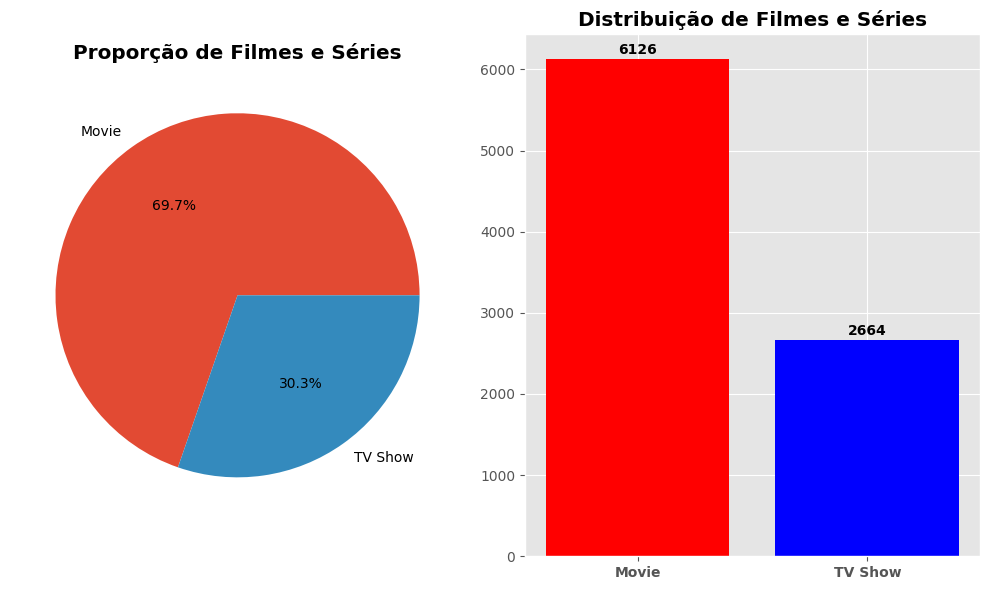

In [ ]:
fig, axs = plt.subplots(
    1,2,
    figsize = (10,6)
)

axs[0].pie(
    df_netflix_prop_movies_series['show_id'],
    labels = df_netflix_prop_movies_series['type'],
    autopct='%1.1f%%'
)

axs[1].bar(
    df_netflix_prop_movies_series['type'],
    df_netflix_prop_movies_series['show_id'],
    color = ['red', 'blue']
)

axs[0].set_title('Proporção de Filmes e Séries', fontweight = 'bold')
axs[1].set_title('Distribuição de Filmes e Séries', fontweight = 'bold')

axs[1].set_xticklabels(df_netflix_prop_movies_series['type'], fontweight = 'bold')
for i, v in enumerate(df_netflix_prop_movies_series['show_id']):
    axs[1].text(i, v + 25, str(v), ha = 'center', va = 'bottom', fontweight = 'bold')

plt.tight_layout()
plt.show()


In [ ]:
# Criação de uma nova coluna apenas com o ano da data
df_netflix['year_added'] = df_netflix['date_added'].dt.year
# Realizando a contagem dos lançamentos por ano
df_netflix_total_titles_year_added = df_netflix.groupby('year_added')['show_id'].count().reset_index()
df_netflix_total_titles_year_added.columns = ['Ano', 'Quantidade']
df_netflix_total_titles_year_added


,Ano,Quantidade
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,426
9,2017,1185


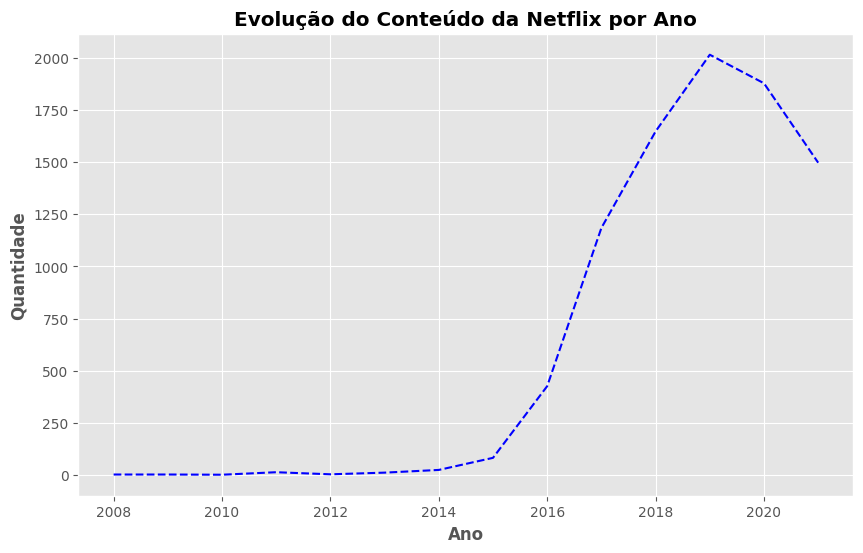

In [ ]:
fig, ax = plt.subplots(
    figsize = (10,6)
)
_ = plt.plot(
    df_netflix_total_titles_year_added['Ano'],
    df_netflix_total_titles_year_added['Quantidade'],
    linestyle = '--',
    color = 'blue'
)

plt.title('Evolução do Conteúdo da Netflix por Ano', fontweight = 'bold')
plt.xlabel('Ano', fontweight = 'bold')
plt.ylabel('Quantidade', fontweight = 'bold')

plt.show()

In [ ]:
# Filtrando o dataset por filmes
df_netflix_mean_movies = df_netflix[df_netflix['type'] == 'Movie']
# Calculando a duração média dos filmes e arredondando para 2 casa decimais
df_netflix_mean_movies = df_netflix_mean_movies['duration'].mean().round(2)

# Filtrando o dataset por series
df_netflix_max_tv_shows = df_netflix[df_netflix['type'] == 'TV Show']
# Capturando apenas a séria com a maior duração em temporadas.
df_netflix_max_tv_shows = df_netflix_max_tv_shows['duration'].max()

print(
    f'''
    Duração média dos filmes: {df_netflix_mean_movies} Minutos \n
    Série com mais temporadas: {df_netflix_max_tv_shows} Temporadas
    '''
)


    Duração média dos filmes: 99.58 Minutos 

    Série com mais temporadas: 17.0 Temporadas
    


In [ ]:
# Filtrando o dataset por filmes
df_netflix_mean_movies = df_netflix[df_netflix['type'] == 'Movie']
# Calculando a duração média dos filmes e arredondando para 2 casa decimais
df_netflix_mean_movies = df_netflix_mean_movies['duration'].mean().round(2)

print(
    f'''
    Duração média dos filmes: {df_netflix_mean_movies} Minutos \n
    '''
)


    Duração média dos filmes: 99.58 Minutos 

    


In [ ]:
# Filtrando o dataset por series
df_netflix_max_tv_shows = df_netflix[df_netflix['type'] == 'TV Show']
# Capturando apenas a séria com a maior duração em temporadas.
df_netflix_max_tv_shows = df_netflix_max_tv_shows['duration'].max()


print(
    f'''
    Série com mais temporadas: {df_netflix_max_tv_shows} Temporadas
    '''
)


    Série com mais temporadas: 17.0 Temporadas
    


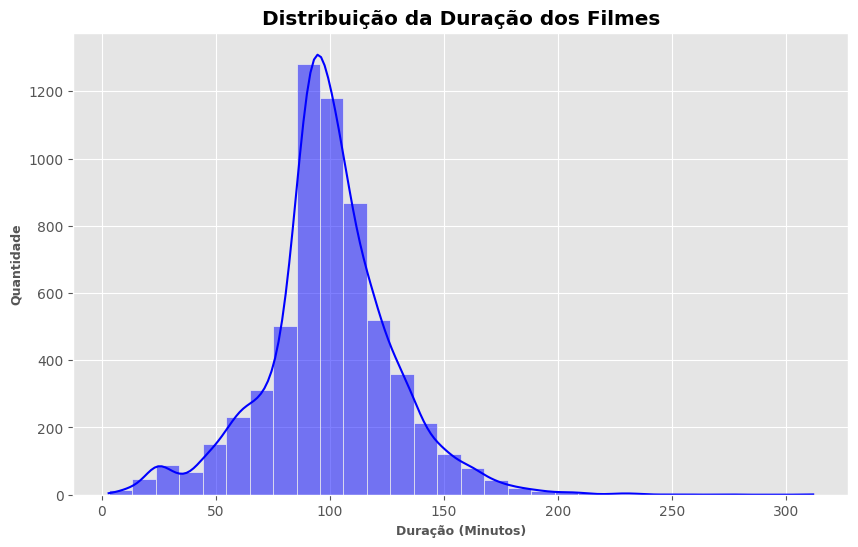

In [ ]:
# Filtrando o dataset para termos apenas filmes
df_netflix_movies = df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies = df_netflix_movies.sort_values(by = 'duration', ascending = False)

# Definindo o tamanho do plot
fig, ax = plt.subplots(
    figsize = (10,6)
)

# Criação do histograma de duração
sns.histplot(
    df_netflix_movies['duration'],
    bins = 30,
    color = 'blue',
    alpha = 0.5,
    ax = ax,
    kde = True
)



ax.set_title('Distribuição da Duração dos Filmes', fontweight = 'bold')
ax.set_xlabel('Duração (Minutos)', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Quantidade', fontweight = 'bold', fontsize = 9)


plt.show()

/tmp/ipython-input-1414746166.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_netflix_tv_shows_top_five_series['title'], fontweight = 'bold', fontsize = 9)


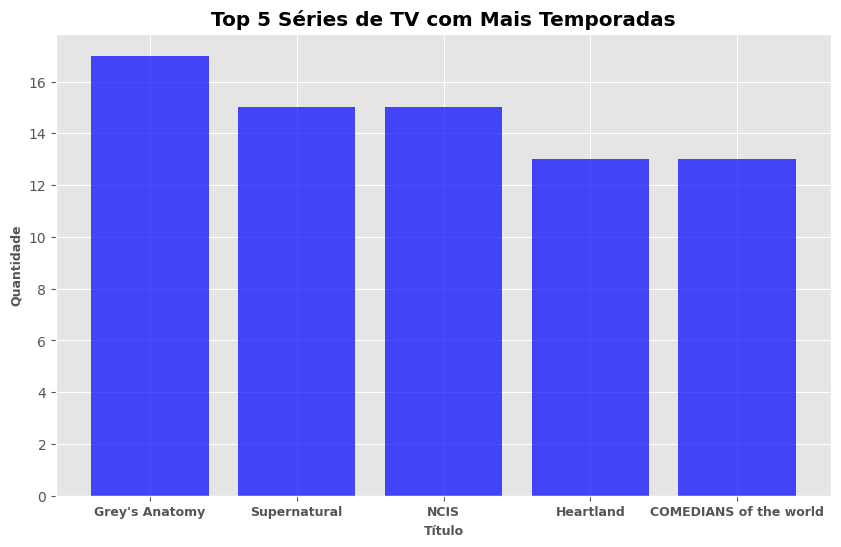

In [ ]:
# Filtrando o dataset por filmes
df_netflix_tv_shows = df_netflix[df_netflix['type'] == 'TV Show']
df_netflix_tv_shows = df_netflix_tv_shows.sort_values(by = 'duration', ascending = False)
df_netflix_tv_shows_top_five_series = df_netflix_tv_shows[['title', 'duration']].head(5)

# Definindo o tamanho do plot
fig, ax = plt.subplots(
    figsize = (10,6)
)
# Criação do grafico de barras
_ = ax.bar(
    df_netflix_tv_shows_top_five_series['title'],
    df_netflix_tv_shows_top_five_series['duration'],
    color = 'blue',
    alpha = 0.7
)

ax.set_title('Top 5 Séries de TV com Mais Temporadas', fontweight = 'bold')
ax.set_xticklabels(df_netflix_tv_shows_top_five_series['title'], fontweight = 'bold', fontsize = 9)
ax.set_xlabel('Título', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Quantidade', fontweight = 'bold', fontsize = 9)


plt.show()

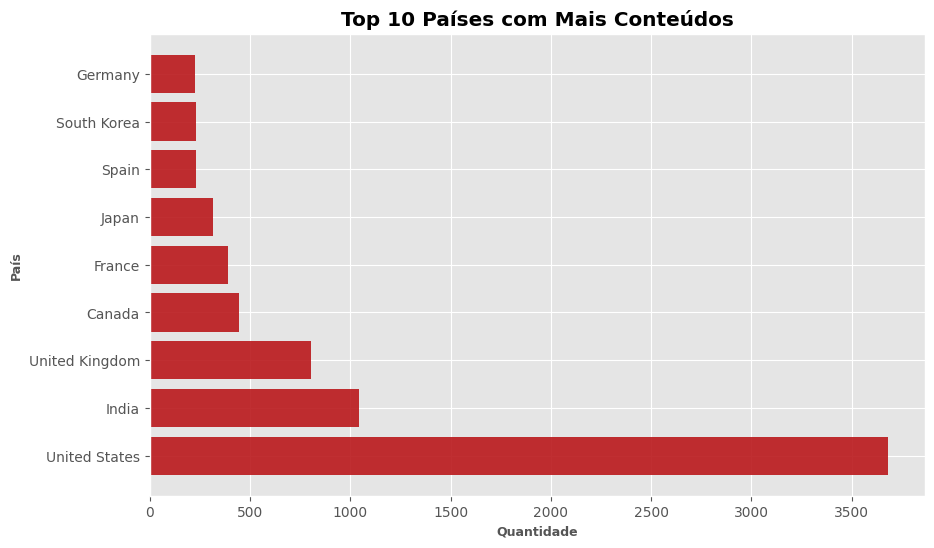

In [ ]:
# Criando a nova coluna de país, onde separamos os titulos com mais de um país
df_netflix['country_expand'] = df_netflix['country'].astype(str)
df_netflix['country_expand'] = df_netflix['country'].str.split(', ')
df_netflix_countries = df_netflix.explode('country_expand')
df_netflix_countries['country_expand'] = df_netflix_countries['country_expand'].str.strip()
df_netflix_countries

# Contando e agrupando os registros por país
df_netflix_countries = df_netflix_countries.value_counts('country_expand', ascending = False).head(10).reset_index()
df_netflix_countries.columns = ['País', 'Quantidade'] # Renomenando as colunas
df_netflix_countries.drop(index = 2, inplace = True) # Retirando o registro de 'country_unknow'

# Definindo o tamanho do gráfico
fig, ax = plt.subplots(
    figsize = (10,6)
)

# Plotando o gráfico.
_ = ax.barh(
    df_netflix_countries['País'],
    df_netflix_countries['Quantidade'],
    color = '#BA181B',
    alpha = 0.9
)

ax.set_title('Top 10 Países com Mais Conteúdos', fontweight = 'bold')
ax.set_xlabel('Quantidade', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('País', fontweight = 'bold', fontsize = 9)



plt.show()

In [ ]:
df_netflix_countries = df_netflix_countries.sort_values('Quantidade', ascending = True)
df_netflix_countries

,País,Quantidade
9,Germany,226
8,South Korea,231
7,Spain,232
6,Japan,316
5,France,393
4,Canada,445
3,United Kingdom,803
1,India,1046
0,United States,3680


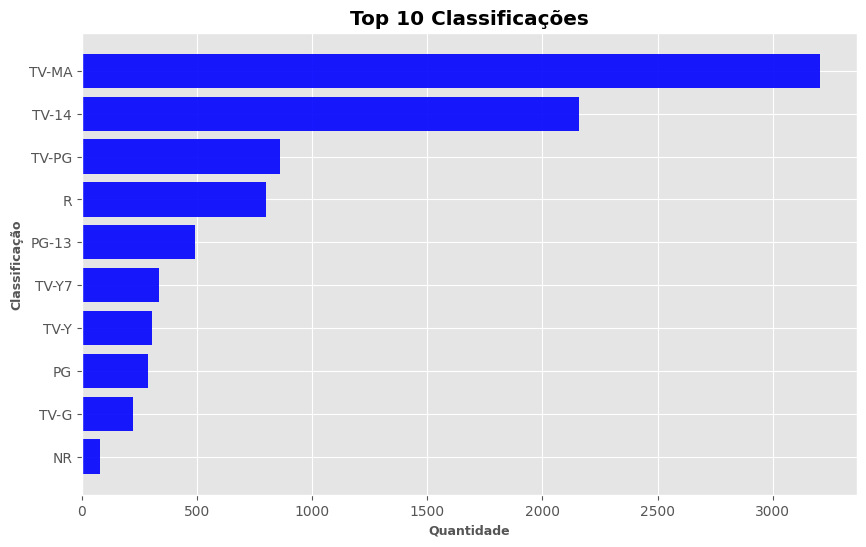

In [ ]:
# Criando um dataset com os valores agrupados por classificação
df_netflix_rating = df_netflix.groupby('rating')['show_id'].count().reset_index()
df_netflix_rating.columns = ['Classificação', 'Quantidade'] # Renomeando as colunas
df_netflix_rating.sort_values('Quantidade', ascending = False, inplace = True)
df_netflix_rating = df_netflix_rating.head(10)
df_netflix_rating

# Definindo o tamanho do plot
fig, ax = plt.subplots(
    figsize = (10,6)
)

# Plotando o gráfico
_ = ax.barh(
    df_netflix_rating['Classificação'],
    df_netflix_rating['Quantidade'],
    color = 'b',
    alpha = 0.9
)

ax.set_title('Top 10 Classificações', fontweight = 'bold')
ax.set_xlabel('Quantidade', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Classificação', fontweight = 'bold', fontsize = 9)
ax.invert_yaxis()

plt.show()

In [ ]:
df_netflix_rating = df_netflix.groupby('rating')['show_id'].count().reset_index()
df_netflix_rating.columns = ['Classificação', 'Quantidade'] # Renomeando as colunas
df_netflix_rating.sort_values('Quantidade', ascending = False, inplace = True)
df_netflix_rating = df_netflix_rating.head(10)
df_netflix_rating

,Classificação,Quantidade
8,TV-MA,3205
6,TV-14,2157
9,TV-PG,861
5,R,799
4,PG-13,490
11,TV-Y7,333
10,TV-Y,306
3,PG,287
7,TV-G,220
2,NR,79


In [ ]:
df_netflix_movies_duration_release_year = df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies_duration_release_year

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,country_expand
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_Unknow,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,[United States]
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",country_Unknow,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,[country_Unknow]
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,"[United States, Ghana, Burkina Faso, United Ki..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,[United States]
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,"[Germany, Czech Republic]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96.0,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,"[United Arab Emirates, Jordan]"
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,[United States]
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,[United States]
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,[United States]


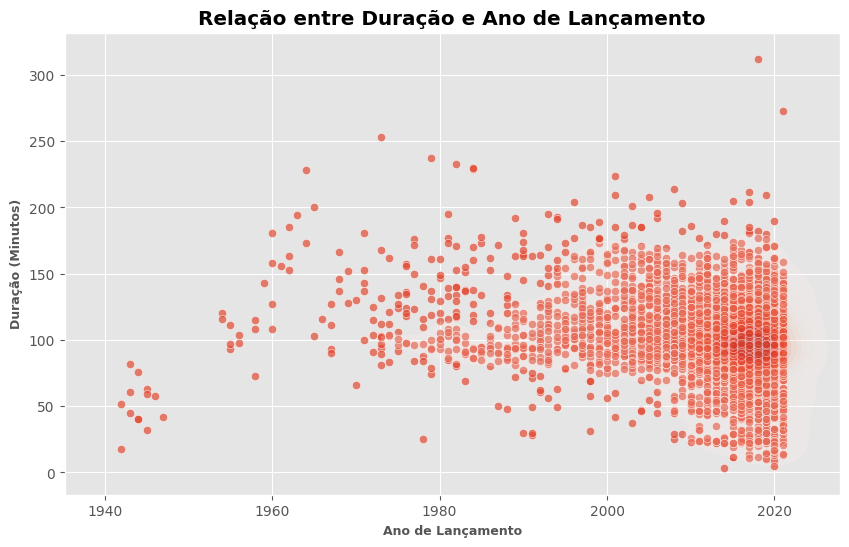

In [ ]:
# Criação de uma nova coluna apenas com o ano da data
df_netflix['year_added'] = df_netflix['date_added'].dt.year

# Realizando a filtragem de um dataset que possue apenas filmes
df_netflix_movies_duration_release_year = df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies_duration_release_year

# definindo o tamanho do plot
fig, ax = plt.subplots(
    figsize = (10,6)
)

# plotando o gráfico de dispersão
_ = sns.scatterplot(
                data = df_netflix_movies_duration_release_year,
    x = 'release_year',
    y = 'duration',
    alpha = 0.7
)

# Plotando a densidade do kernel
sns.kdeplot(
    data = df_netflix_movies_duration_release_year,
    x = 'release_year',
    y = 'duration',
    cmap = 'Reds',
    fill = True,
    alpha = 0.2
)


ax.set_title('Relação entre Duração e Ano de Lançamento', fontweight = 'bold')
ax.set_xlabel('Ano de Lançamento', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Duração (Minutos)', fontweight = 'bold', fontsize = 9)
plt.show()

In [ ]:
# Criando uma nova coluna com os gêneros expandidos
df_netflix['listed_in_expand'] = df_netflix['listed_in'].str.split(',')
df_netflix_listed_in = df_netflix.explode('listed_in_expand')

# Limpando a coluna criada
df_netflix_listed_in['listed_in_expand'] = df_netflix_listed_in['listed_in_expand'].str.strip()

# Criando um novo dataset e agrupando pelos gêneros e ano de lançamento.
df_netflix_listed_in_release_year = df_netflix_listed_in.groupby(['listed_in_expand', 'release_year'])['show_id'].count().reset_index()
# renomenando as novas colunas
df_netflix_listed_in_release_year.columns = ['Gênero', 'Ano', 'Quantidade']

# Agrupando o novo dataset por gênero e ano e somando as quantidades
df_netflix_listed_in_release_year = df_netflix_listed_in_release_year.groupby(['Gênero','Ano'])['Quantidade'].sum().sort_values(ascending = False).reset_index()

# Organizando por ano e quantidade em ordem decrescente
df_netflix_listed_in_release_year.sort_values(
    by = ['Ano', 'Quantidade'],
    ascending = [False, False],
    inplace = True
)

# Filtrando pelos gêneros que tem mais de 70 titulos e especificando que são os gêneros de filmes internacionais, dramas e comedias.
df_netflix_listed_in_release_year = df_netflix_listed_in_release_year[(df_netflix_listed_in_release_year['Quantidade'] > 70) & (df_netflix_listed_in_release_year['Gênero'].isin(['International Movies', 'Dramas', 'Comedies']))]


# Plotando o gráfico.
fig, ax = plt.subplots(
    figsize = (10,6)
)

_ = sns.lineplot(
    data = df_netflix_listed_in_release_year,
    x = 'Ano',
    y = 'Quantidade',
    hue = 'Gênero',
    alpha = 0.7,
    ax = ax
)

ax.set_title('Evolução dos Gêneros ao Longo dos Anos', fontweight = 'bold')
ax.set_xlabel('Ano', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Quantidade', fontweight = 'bold', fontsize = 9)
plt.show()

,Gênero,Ano,Quantidade
21,International Movies,2021,141
40,Dramas,2021,92
8,International Movies,2020,239
12,Dramas,2020,195
26,Comedies,2020,133
5,International Movies,2019,282
7,Dramas,2019,243
18,Comedies,2019,159
0,International Movies,2018,340
3,Dramas,2018,304


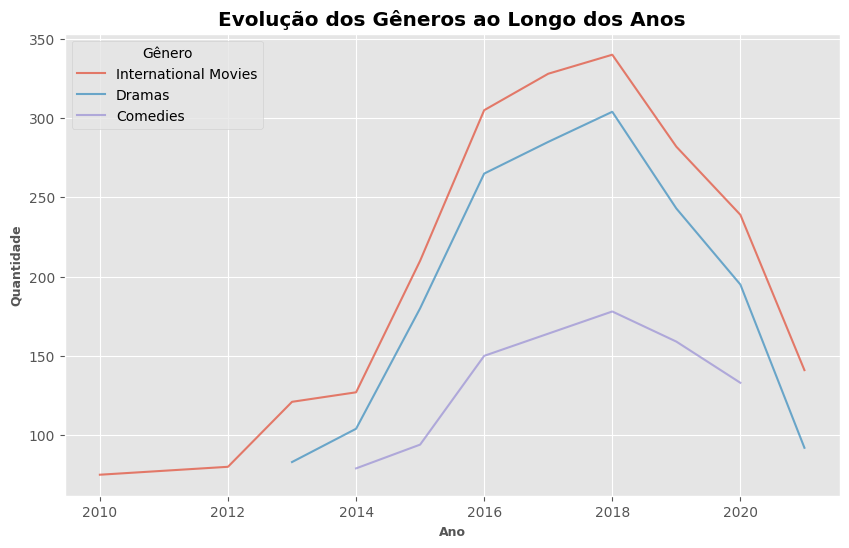

In [ ]:
fig, ax = plt.subplots(
    figsize = (10,6)
)

_ = sns.lineplot(
    data = df_netflix_listed_in_release_year,
    x = 'Ano',
    y = 'Quantidade',
    hue = 'Gênero',
    alpha = 0.7,
    ax = ax
)

ax.set_title('Evolução dos Gêneros ao Longo dos Anos', fontweight = 'bold')
ax.set_xlabel('Ano', fontweight = 'bold', fontsize = 9)
ax.set_ylabel('Quantidade', fontweight = 'bold', fontsize = 9)
plt.show()
